<center>

# **CROP YIELD PREDICTION**

</center>

<img src="crop_yield_image.jpg" style="width:100%; height:400px; object-fit:cover;">

# BACKGROUND

Agriculture is fundamental to human survival and economic stability. It provides the food we consume, employs a significant portion of the global population, and contributes substantially to national economies.

Given the continued rise in human population and the pressing impacts of climate change, the agriculturural sector faces growing challenges. As such, there is the need to understand worldwide crop yield, which is central to addressing food security challenges and reducing the impacts of climate change.

Machine learning plays a crucial role in accurately understanding and predicting crop yields, ensuring food security and supporting sustainable agricultural practices. 

This dataset is taken from the Food and Agriculture Organization and the World Data Bank.

The aim of this project is to **predict the crop yield of 10 most consumed crops in the world**.

# FEATURES OF THE DATASET

- **Area:** The various countries in the dataset. There are 101 unique countries.
- **Item:** The various crops in the dataset. There are 10 unique crops.
- **Year:** Covers the years from 1990 to 2013
- **hg/ha_yield:** Area yield in hectograms per hectare
- **average_rain_fall_mm_per_year:** Average rainfall in mm per each year
- **pesticides_tonnes:** Amount of pesticides used per tone
- **avg_temp:** Average temperature recorded

## IMPORTING LIBRARIES

In [1]:
## importing the necesssary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#!pip install xgboost lightgbm ## uncomment to install if you haven't
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

import warnings
warnings.filterwarnings("ignore")

## 1. DATA LOADING AND INSPECTION

In [2]:
## loading the dataset

crop = pd.read_csv("crop_yield.csv")

In [3]:
## displaying the first five rows

crop.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
## displaying basic info of the dataset

crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


There are no null values in the dataset.

In [5]:
## describing the data - summary statistics

crop.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


# 2. DATA CLEANING

### 2.1 CHECKING FOR DUPLICATES

In [6]:
## checking for duplicates

crop.duplicated().sum()
print(f"There are {crop.duplicated().sum()} duplicates.")

There are 0 duplicates.


### 2.2 STANDARDIZING FEATURE HEADERS

In [7]:
## changing columns - uppercase to lowercase

crop.columns = [col.lower() for col in crop.columns]
crop.head()

,unnamed: 0,area,item,year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


### 2.3 DROPPING IRRELEVANT FEATURES

In [8]:
## dropping the "unnamed" column

crop = crop.drop(["unnamed: 0"], axis = 1)
crop.head()

,area,item,year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


### 2.4 RENAMING FEATURES

In [9]:
## renaming the yield column

crop.rename(columns = {"hg/ha_yield":"yield_hg/ha"}, inplace = True)
crop.head()

,area,item,year,yield_hg/ha,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


# 3. VISUALIZATIONS

### 3.1 CORRELATIONS

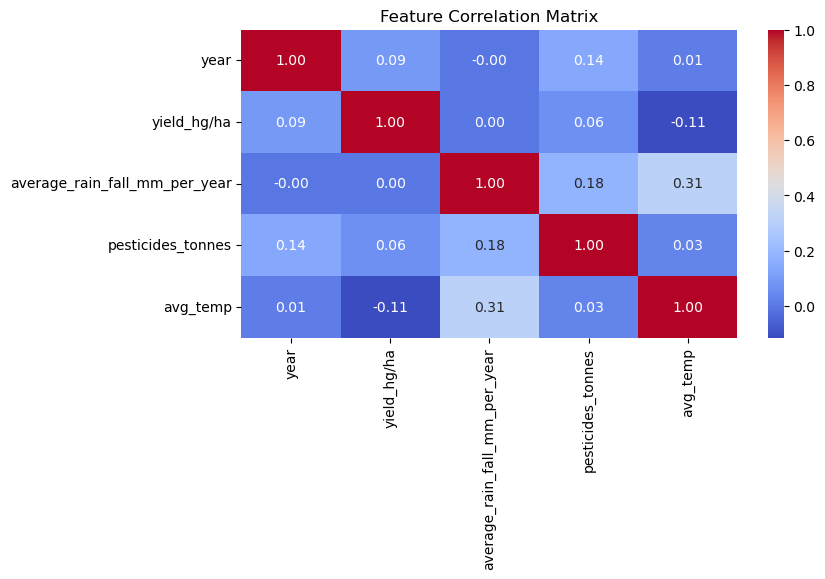

In [10]:
## testing for multicollinearity using the correlation matrix
## computing correlation matrix for only numerical Features
## plotting heatmap

plt.figure(figsize=(8, 4))
sns.heatmap(crop.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

### 3.11 CORRELATIONS - VARIANCE INFLATION FACTOR

In [11]:
## alternatively using VIF to detect multicollinearity

## selecting only numeric columns
numeric_data = crop.select_dtypes(include=["float64", "int64"])

## adding constant
X_const = add_constant(numeric_data)

## computing VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)

                         Feature           VIF
0                          const  82816.680033
1                           year      1.029311
2                    yield_hg/ha      1.026502
3  average_rain_fall_mm_per_year      1.148426
4              pesticides_tonnes      1.059287
5                       avg_temp      1.126678


### 3.2 DISTRIBUTIONS - BOXPLOT

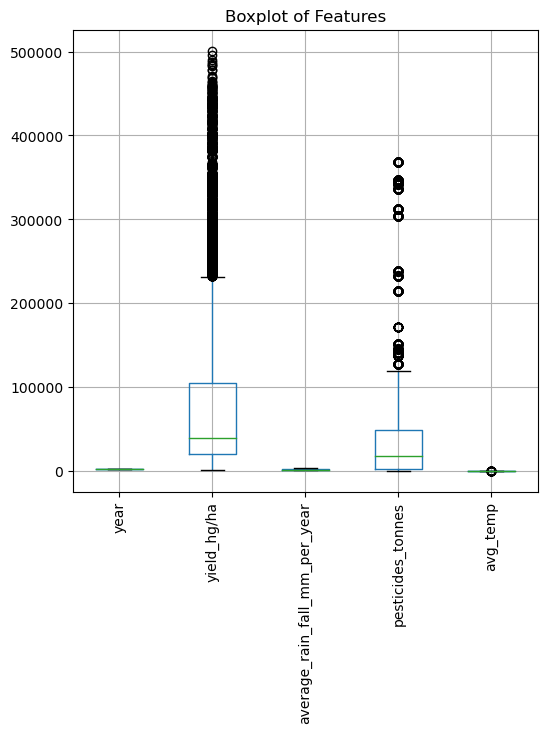

In [12]:
## checking for outliers
## boxplot of features

plt.figure(figsize=(6,6))
crop.boxplot(rot=90)
plt.title("Boxplot of Features")
plt.show()

### 3.1 DISTRIBUTIONS - HISTOGRAM

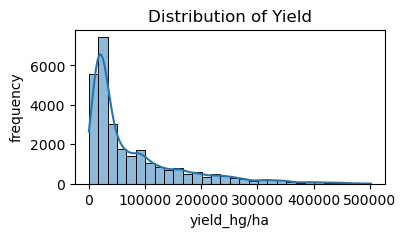

In [13]:
## distribution of the target variable

plt.figure(figsize=(4,2))
sns.histplot(data=crop, x="yield_hg/ha", kde=True, bins=30)
plt.title("Distribution of Yield")
plt.xlabel("yield_hg/ha")
plt.ylabel("frequency")
plt.show()

### 3.3 RELATIONSHIP

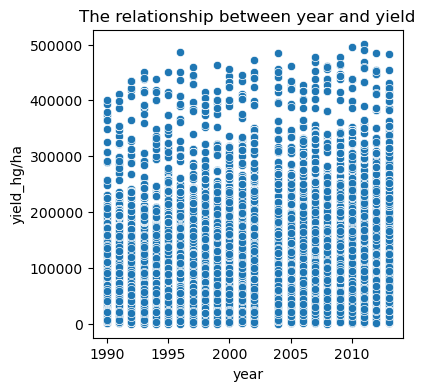

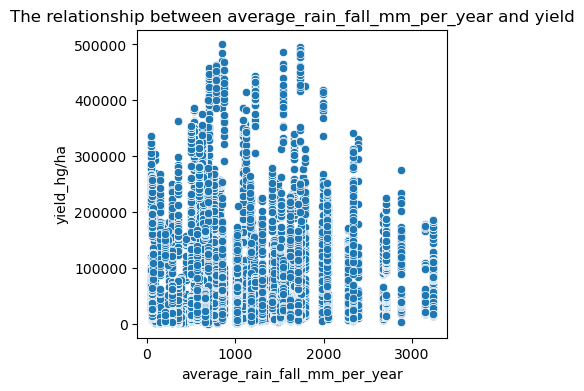

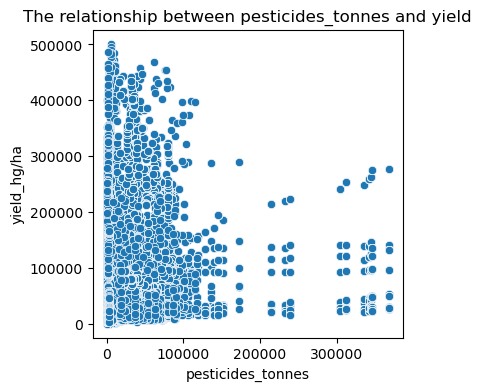

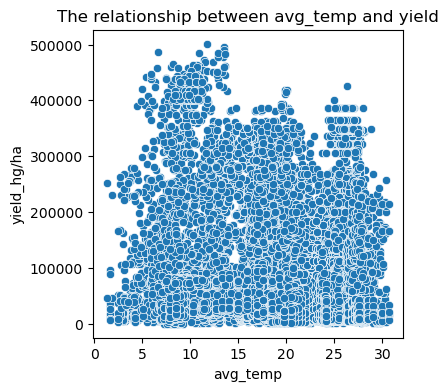

In [14]:
## creating scatter plots to check linearity (using the numeric variables)

features = ["year", "average_rain_fall_mm_per_year", "pesticides_tonnes", "avg_temp"]
X = crop[features]
y = crop["yield_hg/ha"]

for col in X.columns:
    plt.figure(figsize=(4, 4)) 
    sns.scatterplot(x=X[col], y=y)
    plt.title(f"The relationship between {col} and yield")
    plt.xlabel(col)
    plt.ylabel("yield_hg/ha")
    plt.show()

### 3.31 RELATIONSHIPS - SUBPLOTS

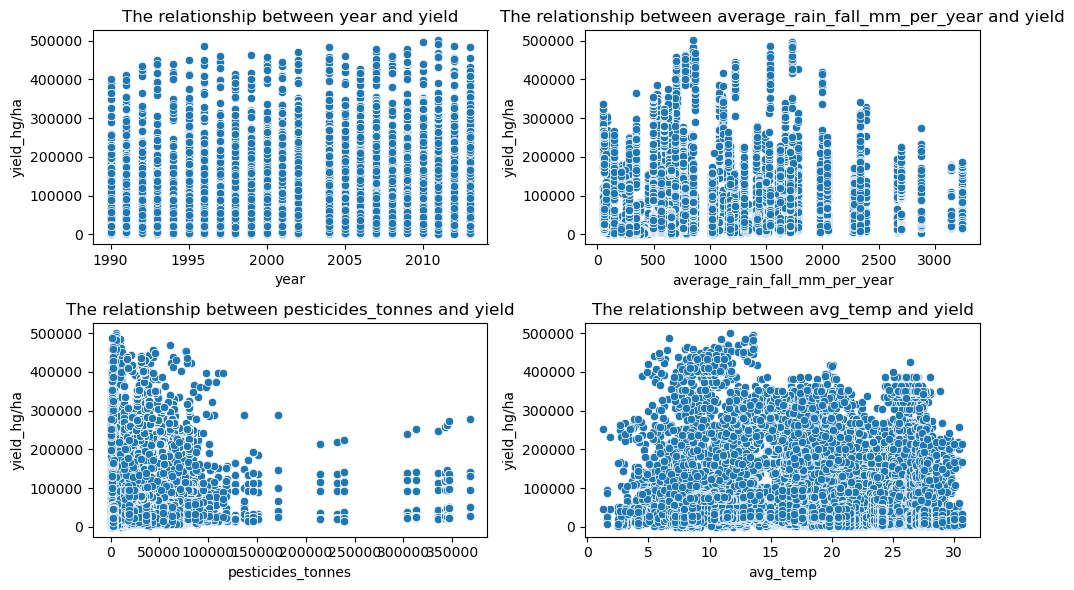

In [15]:
## creating scatter plots (as subplots) to check linearity (using the numeric variables)

features = ["year", "average_rain_fall_mm_per_year", "pesticides_tonnes", "avg_temp"]
X = crop[features]
y = crop["yield_hg/ha"]

## defining the number of columns you want in the subplot (e.g., 2 columns in each row)
num_cols = 2
num_rows = len(X.columns) // num_cols + (len(X.columns) % num_cols != 0) 

## creating a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

## flattening the axes to iterate easily if the layout is 2D
axes = axes.flatten()

for i, col in enumerate(X.columns):
    sns.scatterplot(x=X[col], y=y, ax=axes[i])  ## passing the axis to the scatter plot
    axes[i].set_title(f"The relationship between {col} and yield")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("yield_hg/ha")

## adjusting the layout to avoid overlap
plt.tight_layout()
plt.show()

### OBSERVATIONS FROM THE VARIOUS VISUALIZATIONS

- **3.1** Heatmap - The correlations of our variables are < 0.8 or > -0.8, hence no multicollinearity.
- **3.11** Variance Inflation Factor (VIF) - The VIF < 5, hence no multicollinearity.
- **3.2** Boxplot - Though we have outliers, they are explainable because of the features. One cannot have the same yield and amount of pesticides across all countries and and for all crops in the world.
- **3.3** Histogram - The yield data is right-skewed.
- **3.31**, **3.32** Scatter plots - There is no linear relationship between the numeric features and yield (the target variable).
#### Based on these observations, tree-based models are better suited to this dataset.

# 4. FEATURE ENGINEERING

### 4.1 ONE HOT ENCODING

In [16]:
## encoding the categorical features to dummies (one-hot encoding)

crop_enc = pd.get_dummies(crop, columns=["area","item"], prefix = ["country","item"])  

X = crop_enc.loc[:, crop_enc.columns != "yield_hg/ha"]  
y = crop["yield_hg/ha"]

X.head()

,year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,...,item_Cassava,item_Maize,item_Plantains and others,item_Potatoes,"item_Rice, paddy",item_Sorghum,item_Soybeans,item_Sweet potatoes,item_Wheat,item_Yams
0,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [17]:
## displaying the shape of the dataset with encoded features

X.shape

(28242, 115)

### 4.2 DROPPING IRRELEVANT COLUMNS

In [18]:
## dropping the year column since it's not relevant to the yield (our target)

X = X.drop(['year'], axis=1)
X.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,...,item_Cassava,item_Maize,item_Plantains and others,item_Potatoes,"item_Rice, paddy",item_Sorghum,item_Soybeans,item_Sweet potatoes,item_Wheat,item_Yams
0,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# 5. DATA PREPROCESSING

### 5.1 SCALING THE NUMERIC FEATURES

In [19]:
## scaling the X variables (numeric columns)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 5.2 DATA SPLITTING

In [20]:
## training the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. MODEL TRAINING AND EVALUATION

Our aim is to predict the crop yield of 10 most consumed crops in the world.
So, we are exploring different regression models and comparing the performance to identify the best model.

### 6.1 DECISION TREE REGRESSOR

In [21]:
## initializing the Decision Tree Regressor model

dec_tree = DecisionTreeRegressor()

## fitting the model

dec_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [22]:
## testing or predicting the model

y_pred = dec_tree.predict(X_test)

## evaluating the model peformance

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

## printing the evaluation metrics

print(f"Decision Tree Regressor Model\n{'-'*30}")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Decision Tree Regressor Model
------------------------------
Mean Absolute Error (MAE): 5953.638756122026
Mean Squared Error (MSE): 292240085.21037155
Root Mean Squared Error (RMSE): 17095.031009342205
R-squared (R²): 0.9597114280347708


In [26]:
## saving the Decision Tree Regressor model

joblib.dump(dec_tree, 'dec_tree.pkl')

## loading the model later

dec_tree = joblib.load('dec_tree.pkl')

## making predictions

y_pred = dec_tree.predict(X_test)

## evaluating the model

print(f"Decision Tree Regressor Model\n{'-'*30}")
print(f"R² Score: {r2_score(y_test, y_pred)}")
print(f'Mean Absolute Error (MAE): {mae}')
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f'Root Mean Squared Error (RMSE): {rmse}')

Decision Tree Regressor Model
------------------------------
R² Score: 0.9597114280347708
Mean Absolute Error (MAE): 5953.638756122026
Mean Squared Error: 292240085.21037155
Root Mean Squared Error (RMSE): 17095.031009342205


### 6.2 RANDOM FOREST REGRESSOR

In [27]:
## initializing the Random Forest Regressor model

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

## fitting the model

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
## testing or predicting the model

y_pred = rf_regressor.predict(X_test)

## evaluating the model performance

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

## printing the evaluation metrics

print(f"Random Forest Regressor Model\n{'-'*30}")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Random Forest Regressor Model
------------------------------
Mean Absolute Error (MAE): 5543.398012625433
Mean Squared Error (MSE): 190049701.20961714
Root Mean Squared Error (RMSE): 13785.851486564663
R-squared (R²): 0.9737995180960815


In [29]:
## saving the Random Forest Regressor model

joblib.dump(rf_regressor, 'rf_regressor.pkl')

## loading the model later

rf_regressor = joblib.load('rf_regressor.pkl')

## making predictions

y_pred = rf_regressor.predict(X_test)

## evaluating the model

print(f"Random Forest Regressor Model\n{'-'*30}")
print(f"R² Score: {r2_score(y_test, y_pred)}")
print(f'Mean Absolute Error (MAE): {mae}')
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f'Root Mean Squared Error (RMSE): {rmse}')

Random Forest Regressor Model
------------------------------
R² Score: 0.9737995180960815
Mean Absolute Error (MAE): 5543.398012625433
Mean Squared Error: 190049701.20961714
Root Mean Squared Error (RMSE): 13785.851486564663


### 6.3 GRADIENT BOOSTING REGRESSOR

In [30]:
## initializing the Gradient Boosting Regressor Model

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

## fitting the model

gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [31]:
## testing or presicting the model

y_pred = gb_regressor.predict(X_test)

## evaluating the model performance

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

## printing the evaluation metrics

print(f"Gradient Boosting Regressor Model\n{'-'*30}")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Gradient Boosting Regressor Model
------------------------------
Mean Absolute Error (MAE): 20156.992096200902
Mean Squared Error (MSE): 989654013.3782231
Root Mean Squared Error (RMSE): 31458.76687631324
R-squared (R²): 0.8635650995312147


In [32]:
## saving the Gradient Boosting Regressor model

joblib.dump(gb_regressor, 'gb_regressor.pkl')

## loading the model later

gb_regressor = joblib.load('gb_regressor.pkl')

## making predictions

y_pred = gb_regressor.predict(X_test)

## evaluating the model

print(f"Gradient Boosting Regressor Model\n{'-'*30}")
print(f"R² Score: {r2_score(y_test, y_pred)}")
print(f'Mean Absolute Error (MAE): {mae}')
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f'Root Mean Squared Error (RMSE): {rmse}')

Gradient Boosting Regressor Model
------------------------------
R² Score: 0.8635650995312147
Mean Absolute Error (MAE): 20156.992096200902
Mean Squared Error: 989654013.3782231
Root Mean Squared Error (RMSE): 31458.76687631324


### 6.4 XGBOOST REGRESSOR

In [33]:
## initializing the XGBoost Regressor Model

xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

## fitting the model

xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [34]:
## testing or presicting the model

y_pred = xgb_regressor.predict(X_test)

## evaluating the model performance

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

## printing the evaluation metrics

print(f"XG Boost Regressor Model\n{'-'*30}")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

XG Boost Regressor Model
------------------------------
Mean Absolute Error (MAE): 12481.892758345643
Mean Squared Error (MSE): 401770562.26433915
Root Mean Squared Error (RMSE): 20044.215182050386
R-squared (R²): 0.9446114238584169


In [35]:
## saving the XG Boost Regressor model

joblib.dump(xgb_regressor, 'xgb_regressor.pkl')

## loading the model later

xgb_regressor = joblib.load('xgb_regressor.pkl')

## making predictions

y_pred = xgb_regressor.predict(X_test)

## evaluating the model

print(f"XG Boost Regressor Model\n{'-'*30}")
print(f"R² Score: {r2_score(y_test, y_pred)}")
print(f'Mean Absolute Error (MAE): {mae}')
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f'Root Mean Squared Error (RMSE): {rmse}')

XG Boost Regressor Model
------------------------------
R² Score: 0.9446114238584169
Mean Absolute Error (MAE): 12481.892758345643
Mean Squared Error: 401770562.26433915
Root Mean Squared Error (RMSE): 20044.215182050386


# 7. CONCLUSION

**Best Model**

After training multiple regression models, the **Random Forest Regressor** (rf_regressor.pkl) turned out to be the best performing model for predicting crop yield.

The model achieves an **R² score of 0.97**, indicating that **it is able to explain 97% of the variability in the target variable based on the input features**.

This high R² value suggests that the model is effective in capturing the underlying patterns in the data and making reliable predictions. **The Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) were also within acceptable ranges, further confirming the model’s predictive strength**.